<a href="https://colab.research.google.com/github/IsaacMrSmile/Alura_Bootcamp_Data_Science/blob/main/Acamica_repaso_sprint_1_DS_CLASIFICACI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La idea de este análisis es identificar si un individuo será diabético (1) o no (0).

Los datos fueron extraídos del [National Institute of Diabetes and Digestive and Kidney Diseases](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

# Análisis exploratorio de datos:

In [ ]:
# Importamos los paquetes necesarios:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [ ]:
# Importamos los datos desde la URL pública:

df = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Qué nos dice esto? Necesitamos más información sobre las variables?

De ser así, podemos encontrarla [aquí](https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv)

In [ ]:
df.shape

(768, 9)

Vemos que es un dataset pequeño, probablemente porque es un dataset educativo.

Qué les parece este shape? Consideran que son suficientes filas para hacer un modelo de regresión?

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Ya podemos notarlo en el describe (siempre hay 768 observaciones), pero para ir haciendo a la práctica, chequeemos no tener valores nulos:

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Genial, no hay valores nulos!

Pero no puede ser que estén "disfrazados" de otra cosa?

In [ ]:
# Ejemplo con la insulina:

df.Insulin.value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [ ]:
(df == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Sabemos que las únicas variables en las que esperamos ver 0s es en Pregnancies y Outcome.

In [ ]:
variables_con_ceros = ['Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI']

df[variables_con_ceros]=df[variables_con_ceros].replace(0,df[variables_con_ceros].mean())

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

Para saber el tipo de cada columna:

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Ya podemos empezar a graficar!

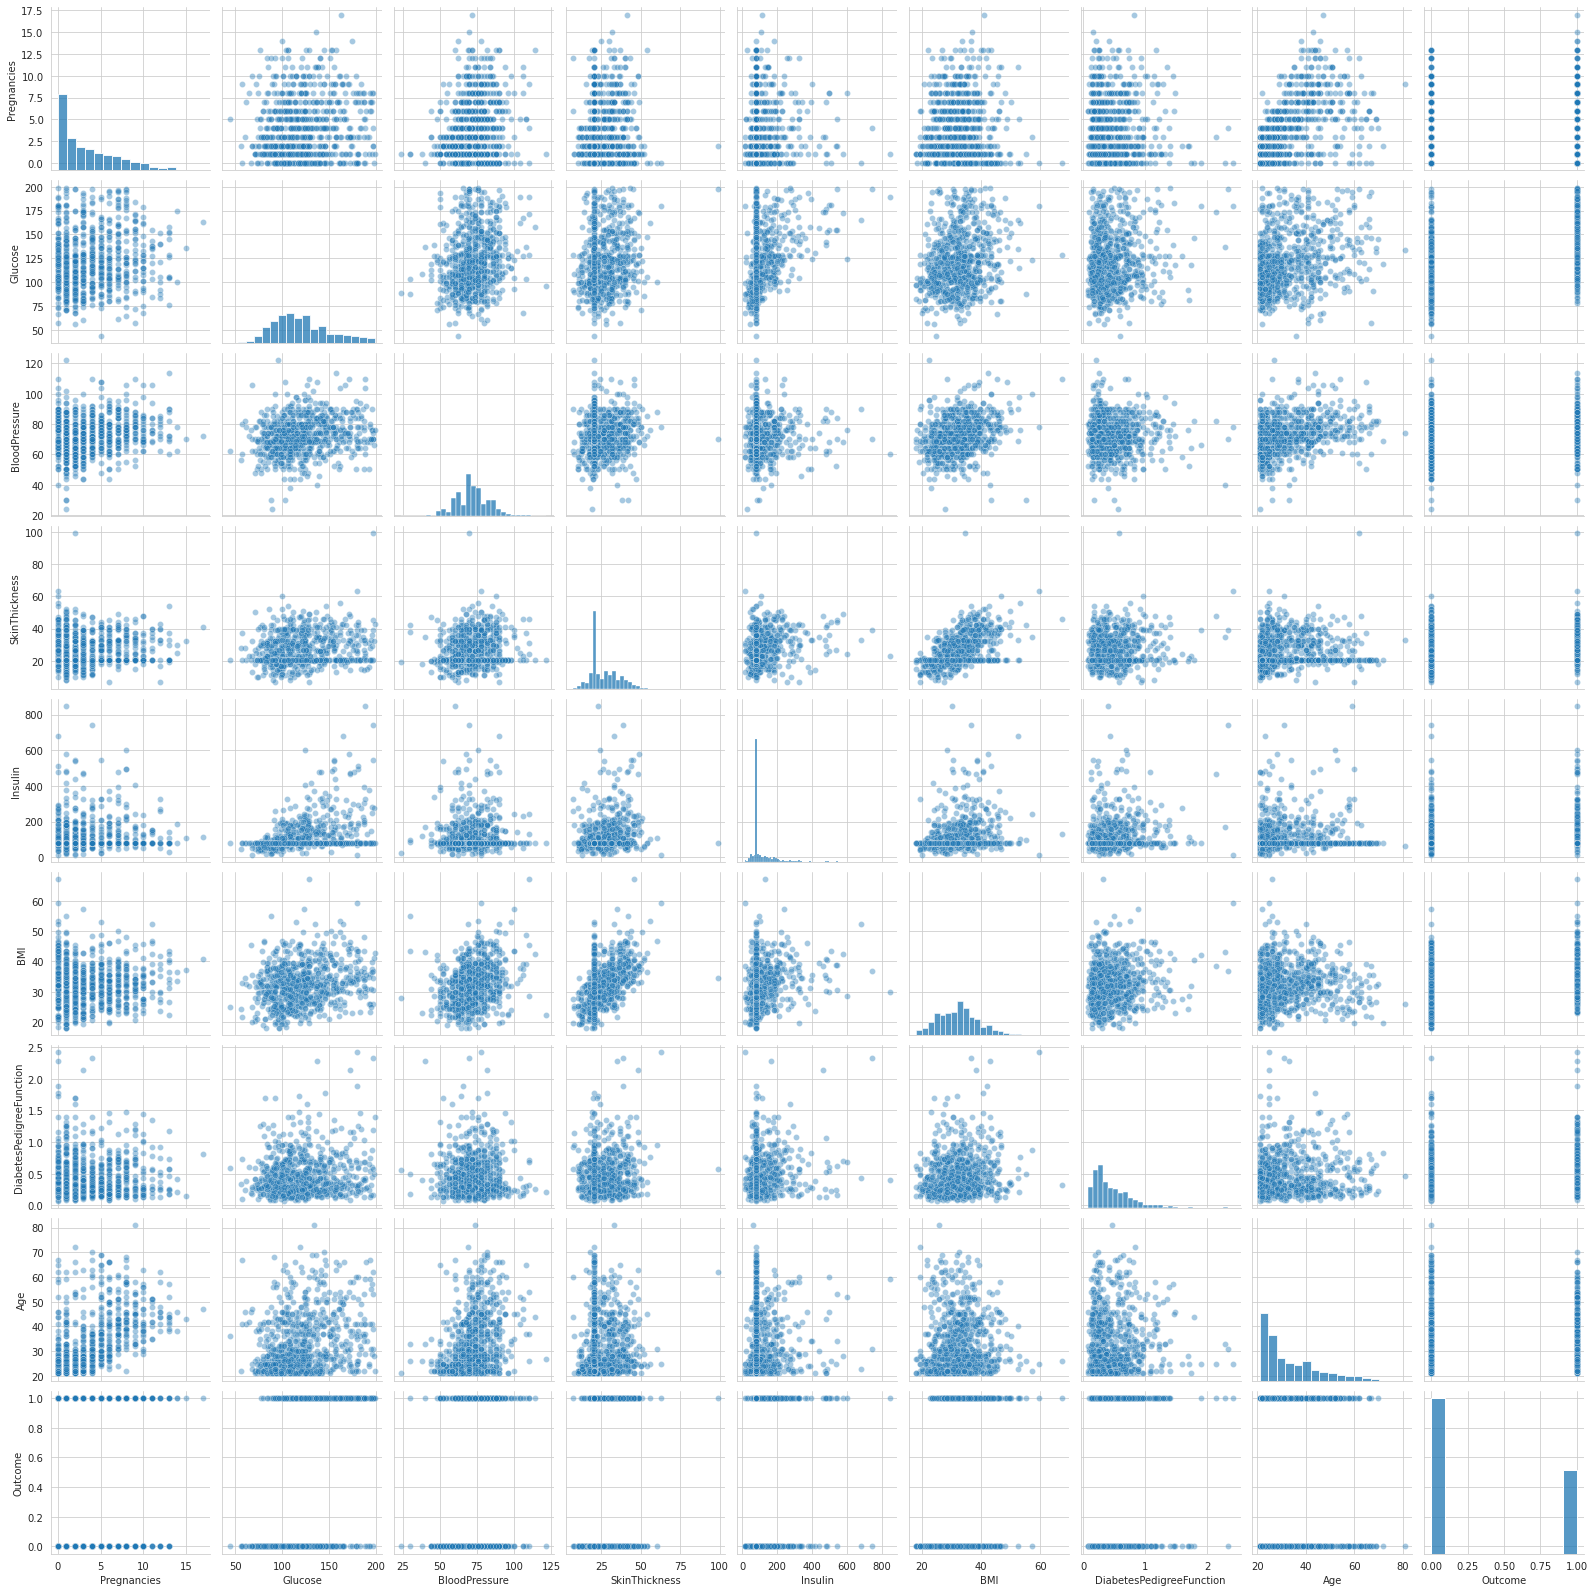

In [ ]:
sns.pairplot(data = df,
             plot_kws={'alpha':0.4})

Como nuestra variable target es binaria, tal vez un pairplot no es la mejor manera de visualizar su relación con las otras variables.

Ahora queremos estudiar a las variables individualmente:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7fc573e64350>,
 <a list of 2 Text major ticklabel objects>)

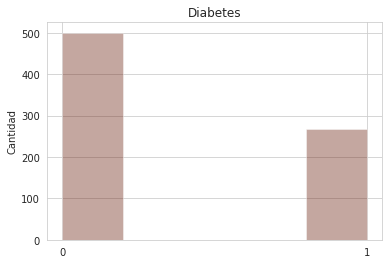

In [ ]:
sns.distplot(df["Outcome"], kde = False, color = '#6D2312')
plt.title('Diabetes')
plt.xlabel('')
plt.ylabel('Cantidad')
plt.xticks([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


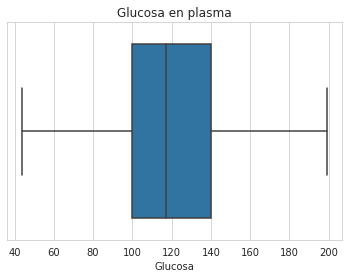

In [ ]:
# Boxplot de glucosa:

sns.boxplot(df.Glucose)
plt.title('Glucosa en plasma')
plt.ylabel('')
plt.xlabel('Glucosa')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Cantidad')

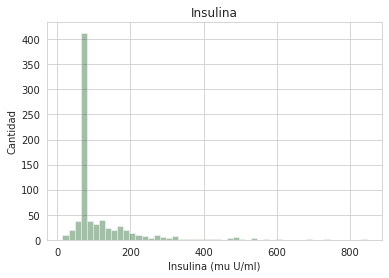

In [ ]:
sns.distplot(df["Insulin"], kde = False, color = '#1D6025') 
plt.title('Insulina')
plt.xlabel('Insulina (mu U/ml)')
plt.ylabel('Cantidad')

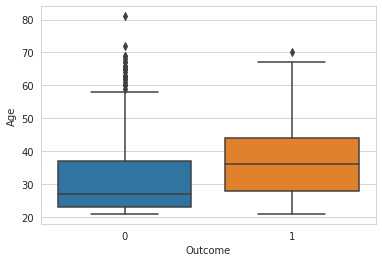

In [ ]:
sns.boxplot(x='Outcome', y='Age', data=df)

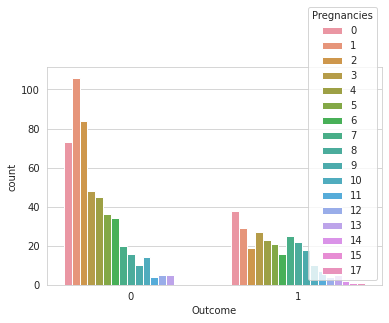

In [ ]:
sns.countplot(x='Outcome', 
              data=df, 
              hue='Pregnancies')

Ahora podemos hacer una matriz de correlación!

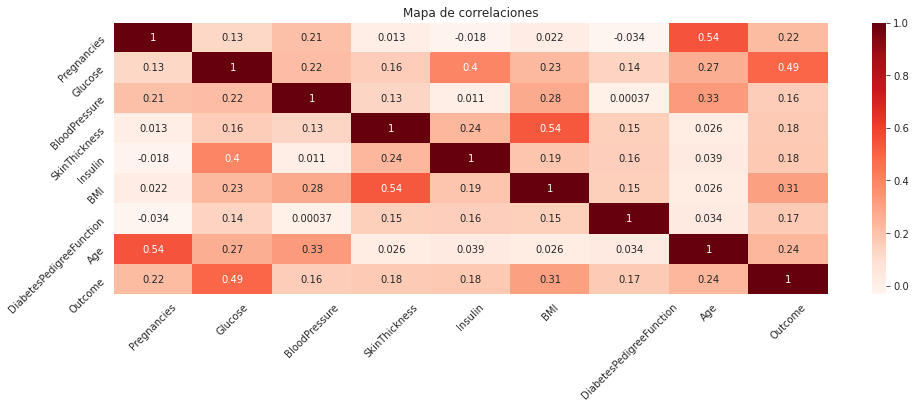

In [ ]:
# Primero creamos una matriz con las correlaciones entre variables de interés
correlacion = df.corr()

# Hacemos gráfico:
plt.figure(figsize = (16,5))
sns.heatmap(correlacion, annot = True, cmap = 'Reds')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Mapa de correlaciones')
plt.show()

# Modelado - clasificación:

In [ ]:
# Importamos los paquetes necesarios:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix

Separamos la target de las variables independientes:

In [ ]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

Dividimos en train y test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Y verificamos que las dimensiones sean correctas:

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


Listo, ya podemos empezar!

## Árbol de decisión:

Primero queremos definir qué hiperparámetros usar:

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

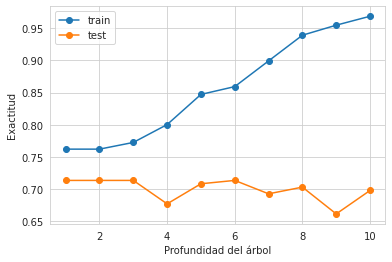

In [ ]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

Cuánto usarían?

Instanciamos el modelo:

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth = 3)

Y lo entrenamos:

In [ ]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predecimos:

In [ ]:
y_pred = clf.predict(X_test)

Y ya podemos comparar las predicciones al test:

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6979166666666666


Y graficar la matriz de confusión:

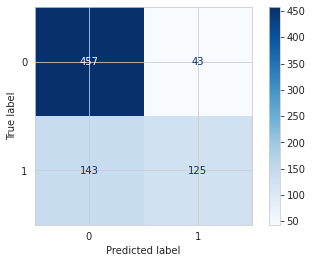

In [ ]:
plot_confusion_matrix(clf_tree, X, y, cmap=plt.cm.Blues, values_format = '.0f')

## KNN:

Nuevamente, primero queremos definir qué hiperparámetros usar:

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

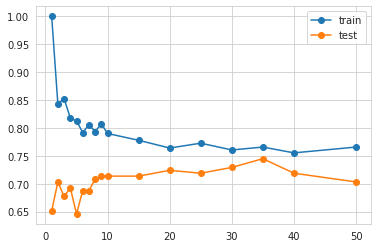

In [ ]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()

Cuánto usarían?

Instanciamos el modelo:

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors = 35)

Y lo entrenamos:

In [ ]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

Predecimos:

In [ ]:
y_pred = clf_knn.predict(X_test)

Y ya podemos comparar las predicciones al test:

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7447916666666666


Y graficar la matriz de confusión:

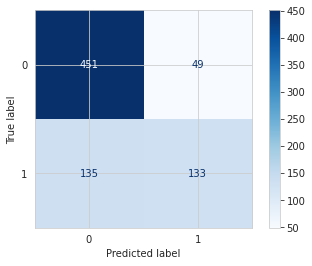

In [ ]:
plot_confusion_matrix(clf_knn, X, y, cmap=plt.cm.Blues, values_format = '.0f')

Con qué modelo se quedarían? Por qué?

Es bueno para predecir diabetes? Y no diabetes?

Qué harían para mejorarlo?